In [16]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df_hh_train=pd.read_csv('HH_Train_Data.csv')
df_pp_train=pd.read_csv('Person_Train_Data.csv')
df_hh_test=pd.read_csv('HH_Test_Data.csv')
df_pp_test=pd.read_csv('Person_Test_Data.csv')

# Count missing values per column
missing_values = df_hh_train.isnull().sum()
print(missing_values)


# max of NCO_3D and min of NIC_5D columns
print(df_hh_train['NCO_3D'].max())
print(df_hh_train['NIC_5D'].min())




HH_ID                                                    0
Sector                                                   0
State                                                    0
NSS-Region                                               0
District                                                 0
Household Type                                           0
Religion of the head of the household                    0
Social Group of the head of the household                0
HH Size (For FDQ)                                        0
NCO_3D                                               19947
NIC_5D                                               19947
Is_online_Clothing_Purchased_Last365                167602
Is_online_Footwear_Purchased_Last365                181550
Is_online_Furniture_fixturesPurchased_Last365       208560
Is_online_Mobile_Handset_Purchased_Last365          205356
Is_online_Personal_Goods_Purchased_Last365          202783
Is_online_Recreation_Goods_Purchased_Last365        2076

In [ ]:
# fill missing values of NCO_3D with 962.0 and NIC_5D with 1110.0
df_hh_train['NCO_3D'].fillna(963, inplace=True)
df_hh_test['NCO_3D'].fillna(963, inplace=True)
df_hh_train['NIC_5D'].fillna(1110, inplace=True)
df_hh_test['NIC_5D'].fillna(1110, inplace=True)

df_hh_train.fillna(0, inplace=True)
df_pp_train.fillna(0, inplace=True)
df_hh_test.fillna(0, inplace=True)
df_pp_test.fillna(0, inplace=True)

C:\Users\Asus\AppData\Local\Temp\ipykernel_16636\757760235.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_hh_train['NCO_3D'].fillna(963, inplace=True)
C:\Users\Asus\AppData\Local\Temp\ipykernel_16636\757760235.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

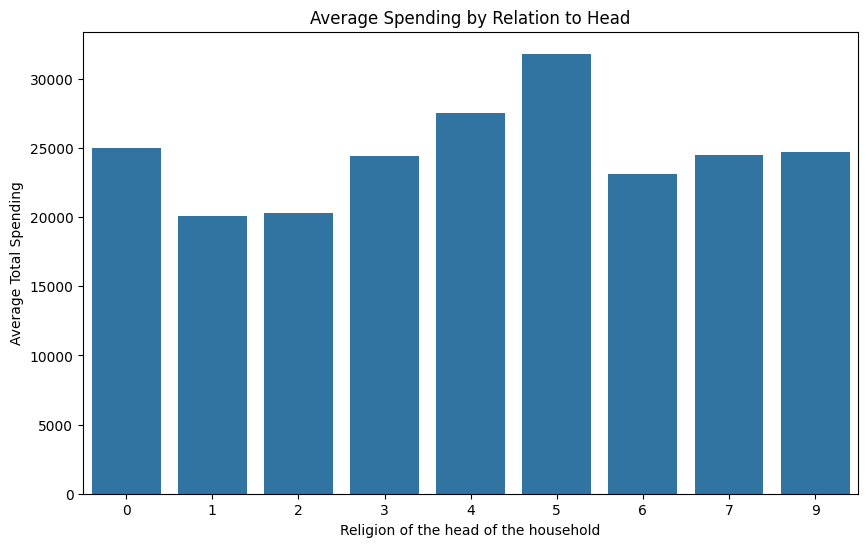

In [21]:
# Calculate the mean spending for each relation category
mean_spending = df_hh_train.groupby('Religion of the head of the household')['TotalExpense'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Religion of the head of the household', y='TotalExpense', data=mean_spending)
plt.xlabel('Religion of the head of the household')
plt.ylabel('Average Total Spending')
plt.title('Average Spending by Relation to Head')
plt.show()


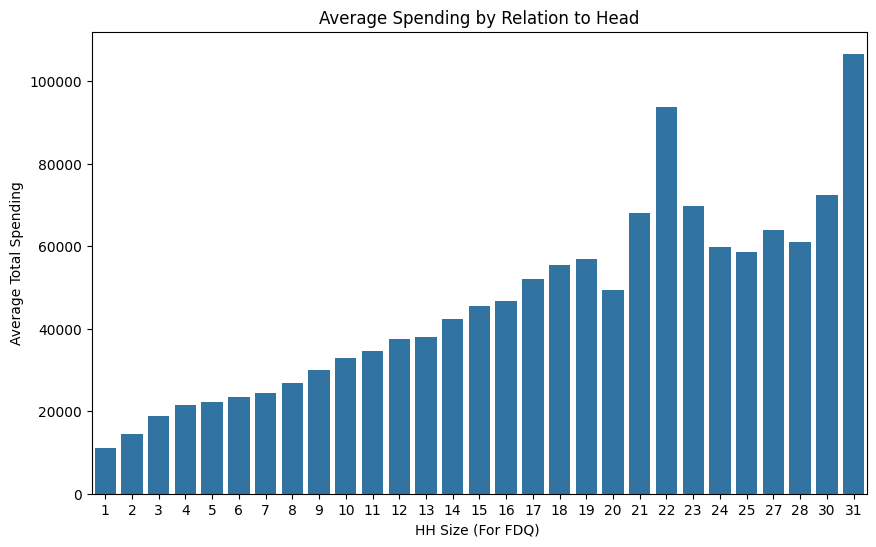

In [22]:
# Calculate the mean spending for each relation category
mean_spending = df_hh_train.groupby('HH Size (For FDQ)')['TotalExpense'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='HH Size (For FDQ)', y='TotalExpense', data=mean_spending)
plt.xlabel('HH Size (For FDQ) ')
plt.ylabel('Average Total Spending')
plt.title('Average Spending by Relation to Head')
plt.show()


In [23]:
def compute_features(group):
    # Count of adults: Age 18-64 (inclusive)
    count_adults = group[(group['Age(in years)'] >= 18) & (group['Age(in years)'] <= 64)].shape[0]
    adults_mean_age = group[(group['Age(in years)'] >= 18) & (group['Age(in years)'] <= 64)]['Age(in years)'].mean() 

    
    # Count of children: Age below 18
    count_children = group[group['Age(in years)'] < 18].shape[0]
    children_mean_age = group[group['Age(in years)'] < 18]['Age(in years)'].mean()
    
    # Count of elders: Age 65 and above
    count_elders = group[group['Age(in years)'] >= 65].shape[0]
    elders_mean_age = group[group['Age(in years)'] >= 65]['Age(in years)'].mean()
    
    # Gender ratio: Count females divided by count males
    # Adjust the gender codes if needed. Here we assume: 1=Male, 2=Female.
    count_males = group[group['Gender'] == 1].shape[0]
    count_females = group[group['Gender'] == 2].shape[0]
    gender_ratio = count_females / (count_males + 1) # Add 1 to avoid division by zero
    
    # Mean age
    mean_age = group['Age(in years)'].mean()
    
    # Dependency ratio: (Count of children + Count of elders) / Count of adults
    dependency_ratio = (count_children + count_elders) / (count_adults + 1) # Add 1 to avoid division by zero
    
    # Count of married: assuming Marital Status code 2 means currently married
    count_married = group[group['Marital Status (code)'] == 2].shape[0]
    
    # Maximum educational level attained (assuming higher code means higher education)
    max_education = group['Highest educational level attained (code)'].max()
    
    # Count of internet users: assuming '1' indicates "Yes"
    count_internet_users = group[group['Whether used internet from any location during last 30 days'] == 1].shape[0]
    
    # Total meals from various sources. Check if column exists before summing.
    total_meals_school = group['No. of meals taken during last 30 days from school, balwadi etc.'].sum() if 'No. of meals taken during last 30 days from school, balwadi etc.' in group.columns else np.nan
    total_meals_employer = group['No. of meals taken during last 30 days from employer as perquisites or part of wage'].sum() if 'No. of meals taken during last 30 days from employer as perquisites or part of wage' in group.columns else np.nan
    total_meals_payment = group['No. of meals taken during last 30 days on payment'].sum() if 'No. of meals taken during last 30 days on payment' in group.columns else np.nan
    total_meals_home = group['No. of meals taken during last 30 days at home'].sum() if 'No. of meals taken during last 30 days at home' in group.columns else np.nan
    total_meals_others = group['No. of meals taken during last 30 days  others'].sum() if 'No. of meals taken during last 30 days  others' in group.columns else np.nan
    
    return pd.Series({
        'count_adults': count_adults,
        'adults_mean_age': adults_mean_age,
        'count_children': count_children,
        'children_mean_age': children_mean_age,
        'count_elders': count_elders,
        'elders_mean_age': elders_mean_age,
        'count_males': count_males,
        'count_females': count_females,
        'gender_ratio': gender_ratio,
        'mean_age': mean_age,
        'dependency_ratio': dependency_ratio,
        'count_married': count_married,
        'max_education': max_education,
        'count_internet_users': count_internet_users,
        'total_meals_school': total_meals_school,
        'total_meals_employer': total_meals_employer,
        'total_meals_payment': total_meals_payment,
        'total_meals_home': total_meals_home,
        'total_meals_others': total_meals_others,
    })




In [28]:
def create_advanced_features(df):
    """Create advanced features that might improve model performance"""
    df_new = df.copy()
    
    # 1. Household composition ratios
    df_new['adult_ratio'] = df_new['count_adults'] / df_new['HH Size (For FDQ)'].replace(0, 1)
    df_new['child_ratio'] = df_new['count_children'] / df_new['HH Size (For FDQ)'].replace(0, 1)
    df_new['elder_ratio'] = df_new['count_elders'] / df_new['HH Size (For FDQ)'].replace(0, 1)
    df_new['male_ratio'] = df_new['count_males'] / df_new['HH Size (For FDQ)'].replace(0, 1)
    df_new['female_ratio'] = df_new['count_females'] / df_new['HH Size (For FDQ)'].replace(0, 1)
    df_new['married_ratio'] = df_new['count_married'] / df_new['HH Size (For FDQ)'].replace(0, 1)
    
    # 2. Asset indexes
    # Create a luxury index
    luxury_cols = ['Is_HH_Have_Television', 'Is_HH_Have_Laptop_PC', 'Is_HH_Have_Motorcar_jeep_van', 
                  'Is_HH_Have_Refrigerator', 'Is_HH_Have_Washing_machine', 'Is_HH_Have_Airconditioner_aircooler']
    df_new['luxury_index'] = df_new[luxury_cols].sum(axis=1)
    
    # Create a mobility index
    mobility_cols = ['Is_HH_Have_Bicycle', 'Is_HH_Have_Motorcycle_scooter', 'Is_HH_Have_Motorcar_jeep_van', 
                    'Is_HH_Have_Trucks', 'Is_HH_Have_Animal_cart']
    df_new['mobility_index'] = df_new[mobility_cols].sum(axis=1)
    
    # 3. Online purchase behavior index
    online_cols = [col for col in df_new.columns if 'online' in col.lower()]
    df_new['online_purchase_index'] = df_new[online_cols].sum(axis=1)
    
    # 4. Meal source diversity index
    meal_cols = [col for col in df_new.columns if 'meals' in col.lower()]
    df_new['meal_diversity'] = (df_new[meal_cols] > 0).sum(axis=1)  # Count different meal sources
    
    # 5. Interaction terms
    df_new['wealth_education'] = df_new['luxury_index'] * df_new['max_education']
    df_new['tech_education'] = df_new['Is_HH_Have_Laptop_PC'] * df_new['max_education']
    
    # 6. Polynomial features for important numeric columns
    for col in ['mean_age', 'max_education', 'count_internet_users']:
        df_new[f'{col}_squared'] = df_new[col] ** 2
    
    # 7. Geographic clustering (if we have lat/long, otherwise use region/state)
    if 'NSS-Region' in df_new.columns and 'State' in df_new.columns:
        df_new['geo_cluster'] = df_new['State'] * 100 + df_new['NSS-Region']
    
    # 8. Add categorical interactions as new categories
    if 'Religion of the head of the household' in df_new.columns and 'Social Group of the head of the household' in df_new.columns:
        df_new['religion_social_group'] = df_new['Religion of the head of the household'] * 10 + df_new['Social Group of the head of the household']
    
    # 9. Log transforms of counts (useful for skewed distributions)
    for col in ['count_adults', 'count_children', 'HH Size (For FDQ)']:
        df_new[f'log_{col}'] = np.log1p(df_new[col])
    
    
    return df_new

df_train = pd.read_csv('aggregated_data_train.csv')
df_test = pd.read_csv('aggregated_data_test.csv')

# Apply the feature engineering to the cleaned dataframe
df_enriched_train = create_advanced_features(df_train)
print(f"Original features: {df_train.shape[1]}")
print(f"After feature engineering: {df_enriched_train.shape[1]}")

df_enriched_test = create_advanced_features(df_test)


# Save the enriched data to CSV files
df_enriched_train.to_csv('enriched_data_train.csv', index=False)
df_enriched_test.to_csv('enriched_data_test.csv', index=False)
print("Saved enriched data to CSV files")

Original features: 54
After feature engineering: 74


In [29]:
# missing values
df_enriched_train.isnull().sum().sum()

np.int64(0)

In [24]:
# Group the person-level dataset by HH_ID and compute the aggregated features.
person_features = df_pp_train.groupby('HH_ID').apply(compute_features).reset_index()

# Merge the computed features into the household dataset using HH_ID.
master_df = pd.merge(df_hh_train, person_features, on='HH_ID', how='left')

# fill missing values of person features with 0
master_df.fillna(0, inplace=True)

# Optional: Save the master dataset to a new CSV file.
master_df.to_csv("aggregated_data_train.csv", index=False)

print("Master train dataset created successfully!")

KeyboardInterrupt: 

In [ ]:
# Group the person-level dataset by HH_ID and compute the aggregated features.
person_features = df_pp_test.groupby('HH_ID').apply(compute_features).reset_index()

# Merge the computed features into the household dataset using HH_ID.
master_df = pd.merge(df_hh_test, person_features, on='HH_ID', how='left')

# fill missing values of person features with 0
master_df.fillna(0, inplace=True)

# Optional: Save the master dataset to a new CSV file.
master_df.to_csv("aggregated_data_test.csv", index=False)

print("Master test dataset created successfully!")


C:\Users\Asus\AppData\Local\Temp\ipykernel_16636\249950783.py:2: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  person_features = df_pp_test.groupby('HH_ID').apply(compute_features).reset_index()


Master test dataset created successfully!


In [ ]:
master_df.head()

,HH_ID,Sector,State,NSS-Region,District,Household Type,Religion of the head of the household,Social Group of the head of the household,HH Size (For FDQ),NCO_3D,...,mean_age,dependency_ratio,count_married,max_education,count_internet_users,total_meals_school,total_meals_employer,total_meals_payment,total_meals_home,total_meals_others
0,HCES2022619881191951823044219131316,1,19,195,18,2,1,2,2,731.0,...,59.000000,0.000000,2.0,4.0,0.0,0.0,0.0,0.0,120.0,0.0
1,HCES2022617721191931723197219202205,1,19,193,17,4,1,9,4,325.0,...,16.000000,0.666667,2.0,7.0,2.0,0.0,0.0,0.0,360.0,0.0
2,HCES2022632771101011022015110131311,1,10,101,10,4,1,3,3,512.0,...,21.666667,1.000000,0.0,4.0,0.0,0.0,0.0,0.0,240.0,0.0
3,HCES2022357832080822112037108101306,2,8,82,21,1,1,9,4,611.0,...,44.500000,0.666667,2.0,11.0,3.0,0.0,0.0,0.0,240.0,0.0
4,HCES20226869012727230232010227422206,1,27,272,30,1,1,9,3,611.0,...,29.000000,0.000000,0.0,12.0,2.0,0.0,0.0,0.0,208.0,2.0


In [ ]:
master_df.isnull().sum()

HH_ID                                                   0
Sector                                                  0
State                                                   0
NSS-Region                                              0
District                                                0
Household Type                                          0
Religion of the head of the household                   0
Social Group of the head of the household               0
HH Size (For FDQ)                                       0
NCO_3D                                                  0
NIC_5D                                                  0
Is_online_Clothing_Purchased_Last365                    0
Is_online_Footwear_Purchased_Last365                    0
Is_online_Furniture_fixturesPurchased_Last365           0
Is_online_Mobile_Handset_Purchased_Last365              0
Is_online_Personal_Goods_Purchased_Last365              0
Is_online_Recreation_Goods_Purchased_Last365            0
Is_online_Hous

52350

In [ ]:
master_df.info

<bound method DataFrame.info of                                       HH_ID  Sector  State  NSS-Region  \
0       HCES2022619881191951823044219131316       1     19         195   
1       HCES2022617721191931723197219202205       1     19         193   
2       HCES2022632771101011022015110131311       1     10         101   
3       HCES2022357832080822112037108101306       2      8          82   
4      HCES20226869012727230232010227422206       1     27         272   
...                                     ...     ...    ...         ...   
52345   HCES2022625161101010223331210124304       1     10         101   
52346   HCES2022677831343410223012133233316       1     34         341   
52347   HCES2022666521080832623162208123306       1      8          83   
52348   HCES2022398492323220712078232131305       2     32         322   
52349   HCES2022669761090935323106209222101       1      9          93   

       District  Household Type  Religion of the head of the household  \
0    